## IMBd Moview Review Classifier: Multinomial Naive Bayes

### Background

This was one of the first widely-available **sentiment analysis** datasets compiled by Pang and Lee's. The data was first collected in 2002, however, the text is similar to movies reviews we find on IMDB today. 

The dataset is in a CSV format. It has two categories: Pos (reviews that express a positive or favourable sentiment) and Neg (reviews that express a negative or unfavourable sentiment). For this exercise, we assume that all reviews are either positive or negative; there are no neutral reviews.

 
### Objective

We need to build a Multinomial Naive Bayes classification model in Python for predicting the sentiment inherent to the reviews

### Approach

The following steps are followed to build the Naive Bayes model for IMDb sentiment analysis:

1. Import & Preprocess Data
2. Build Bernoulli's Model
3. Evaluate Bernoulli's Model
4. Build Multinomial Model
5. Evaluate Multinomial Model
6. Conclusion

### 1. Importing and Preprocessing Data 

In [266]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [267]:
# Reading the training data
reviews = pd.read_csv('movie_review_train.csv')
reviews.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [268]:
# Checking the data (reviews) volume & quality
print(reviews.shape)

reviews.info()

(1600, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1600 non-null   object
 1   text    1600 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


**Observation:** There are no missing data in the set

In [270]:
# Check the distribution of Pos(itive) and Neg(ative) reviews

reviews['class'].value_counts()

class
Pos    800
Neg    800
Name: count, dtype: int64

Pos & Neg data sets are each 50% in numbers making it a very balanced dataset

In [272]:
# Mapping the labels to 1 (Pos) and 0 (Neg) as Classifier understand only numeric values

reviews['label'] = reviews['class'].map({"Pos" : 1, "Neg" : 0})

reviews.label.value_counts()

label
1    800
0    800
Name: count, dtype: int64

In [273]:
# Drop the class column as it's no more required
reviews.drop('class', axis=1, inplace=True)

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1600 non-null   object
 1   label   1600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.1+ KB


In [274]:
# Create the X and y vectors for training
X_train = reviews.text
y_train = reviews.label

print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [275]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: text, dtype: object

In [276]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [277]:
# Vectorize the review sentences after removing stop words
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [278]:
# List the initial few word features from vect
print(list(vect.vocabulary_)[:10])

['common', 'complaint', 'film', 'critics', 'aren', 'literate', 'scripts', 'available', 'quiz', 'gives']


In [279]:
# Check the vocab size
len(vect.vocabulary_.keys())

35858

We don't want to consider those (rare) words which have appeared only in 3% of the reviews, and those extremely common ones which have appeared in 80% of the documents. Accordingly re-vectorize the training data set

In [281]:
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect.fit(X_train)

# Check the vocab size
len(vect.vocabulary_.keys())

1643

In [282]:
# Transform the training data using this vectorizer (min_df=.03, max_df=.8)
X_train_nb = vect.transform(X_train)

# Check the X_train_nb data set which is in compressed sparse row format
X_train_nb

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

### 2. Building Bernoulli's Naive Bayes Model

In [284]:
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit the model using training data
bnb.fit(X_train_nb,y_train)

BernoulliNB()

In [285]:
# It's to be noted that the alpha is by default = 1
print(bnb.alpha)

1.0


### 3. Evaluating the Naive Bayes Model

In [287]:
# Read the test data
reviews_test = pd.read_csv('movie_review_test.csv')

reviews_test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [288]:
# Check the test data volume
reviews_test.shape

(400, 2)

In [289]:
# Mapping the test data labels to 1 (Pos) and 0 (Neg)

reviews_test['label'] = reviews_test['class'].map({"Pos" : 1, "Neg" : 0})

reviews_test.label.value_counts()

label
1    200
0    200
Name: count, dtype: int64

In [290]:
# Drop the class column as it's not required for further evaluation
reviews_test.drop('class', axis=1, inplace=True)

reviews_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    400 non-null    object
 1   label   400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [291]:
# Create the X and y vectors for test
X_test = reviews_test.text
y_test = reviews_test.label

print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [292]:
# Transform the test data using Vectorizer using min_df=.03, max_df=.8
X_test_nb = vect.transform(X_test)

# Check the X_test_nb data set
X_test_nb

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [293]:
# predict classes using test data set
y_pred_class = bnb.predict(X_test_nb)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_nb)

# accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.79

In [294]:
# confusion matrix - help(metrics.confusion_matrix)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
confusion

array([[177,  23],
       [ 61, 139]])

In [295]:
# Cells of Confusion Matrix
# C{i, j} is the number which is known to be in class i but are predicted in class j. 
# E.g. in this case, {0,1} is thus actually 0 (negative) and predicted 1 (positive).
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [296]:
# Check the value of False Positive
FP

23

In [297]:
# List the various metrics data

# Sensitivity
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

# Specificity
specificity = TN / float(TN + FP)
print("specificity",specificity)

# Precision
precision = TP / float(TP + FP)
print("precision",precision)

sensitivity 0.695
specificity 0.885
precision 0.8580246913580247


In [298]:
# Printing same metrics using in-built functions
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

PRECISION SCORE : 0.8580246913580247
RECALL SCORE : 0.695
F1 SCORE : 0.7679558011049723


The **Accuracy** (0.79) and **Specificity** (0.885) scores are quite decent in this model, but **Sensitivity** (0.695) is below par. We will try out Multinomial NB model next to check if it balances Sensitivity and Specificity better.

In [300]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate = False)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print Area Under Curve(AUC)
round(roc_auc, 3)

0.873

In [301]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             }).head()

,Threshold,TPR,FPR
0,2.0,0.000,0.0
1,1.0,0.015,0.0
2,1.0,0.020,0.0
3,1.0,0.025,0.0
4,1.0,0.030,0.0


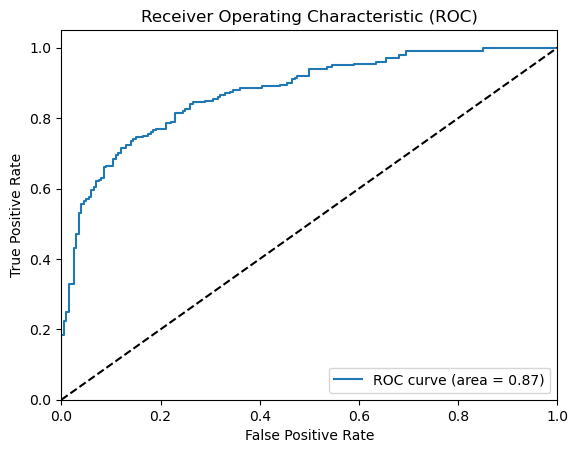

In [302]:
# plotting the ROC curve
%matplotlib inline  
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Area under ROC curve (0.87) is quite descent, but we will check if Multinomial model can improve it.

### 4. Building Multinomial Naive Bayes Model

In [305]:
# Training the NB model and making predictions
mnb = MultinomialNB()

# fit
mnb.fit(X_train_nb,y_train)

MultinomialNB()

### 5. Evaluating the Multinomial Naive Bayes Model

In [307]:
# Check the alpha which is by default=1
mnb.alpha

1.0

In [308]:
# Predict using test data
y_pred_class = mnb.predict(X_test_nb)

# Predict the probabilities
y_pred_proba = mnb.predict_proba(X_test_nb)

# help(metrics.accuracy_score)
metrics.accuracy_score(y_test, y_pred_class)

0.8275

In [309]:
# Review the confusion metrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
confusion

array([[172,  28],
       [ 41, 159]])

In [310]:
# Assign the cells values of Confusion Metrics
# 0 -> Negative Reviews and 1 -> Positive Reviews
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [311]:
# Compute the various metrics values

# Sensitivity
print(f"Sensitivity: {TP/float(TP+FN): 0.3f}")

# Specificity
print(f"Specificity: {TN/float(TN+FP): 0.3f}")

# Precision
print(f"Precision: {TP/float(TP+FP): 0.3f}")

Sensitivity:  0.795
Specificity:  0.860
Precision:  0.850


In [312]:
# Confirm the above computation using in-built functions
print("PRECISION SCORE : {:0.3f}".format(metrics.precision_score(y_test, y_pred_class)))
print("RECALL or SENSITIVITY SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE : {:0.3f}".format(metrics.f1_score(y_test, y_pred_class)))

PRECISION SCORE : 0.850
RECALL or SENSITIVITY SCORE : 0.795
F1 SCORE : 0.822


The **Accuracy** (0.827) score has improved slightly over Bernoulli's model. The **Specificity** (0.860) score is stable, but **Sensitivity** (0.795) got a significant improvement. This is a better model with improved trade-off among the metric scores.

In [314]:
# Display the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate = False)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print Area Under Curve(AUC)
round(roc_auc, 3)

0.888

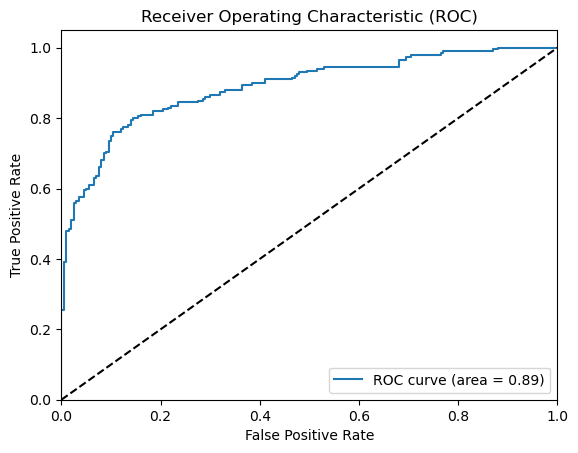

In [315]:
# plotting the ROC curve
%matplotlib inline  
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

There is no significant increase in the area under ROC cureve over the Bernoulli's model

In [317]:
# Get the log probabilities for each class (positive and negative)
log_prob = bnb.feature_log_prob_

# Get the feature names (words)
feature_names = vect.get_feature_names_out()

# Sort the words for positive sentiment (class 1)
top_positive_indices = np.argsort(log_prob[1])[::-1]
top_positive_words = [feature_names[i] for i in top_positive_indices[:10]]
top_positive_probs = [round(np.exp(log_prob[1][i]), 2) for i in top_positive_indices[:10]]

# Sort the words for negative sentiment (class 0)
top_negative_indices = np.argsort(log_prob[0])[::-1]
top_negative_words = [feature_names[i] for i in top_negative_indices[:10]]
top_negative_probs = [round(np.exp(log_prob[0][i]), 2) for i in top_negative_indices[:10]]

print("Top Positive Words:", top_positive_words)
print("Top Positive Probabilities:", top_positive_probs)
print("Top Negative Words:", top_negative_words)
print("Top Negative Probabilities:", top_negative_probs)

Top Positive Words: ['movie', 'like', 'time', 'just', 'good', 'story', 'way', 'does', 'character', 'make']
Top Positive Probabilities: [0.74, 0.71, 0.65, 0.63, 0.61, 0.57, 0.54, 0.53, 0.53, 0.5]
Top Negative Words: ['movie', 'like', 'just', 'time', 'good', 'make', 'bad', 'plot', 'character', 'story']
Top Negative Probabilities: [0.82, 0.77, 0.69, 0.62, 0.59, 0.52, 0.52, 0.51, 0.51, 0.5]


### 6. Conclusion

We’ve built a sentiment analysis model to help understand customer opinions on movies by predicting whether a review is positive or negative. It helps in gauging overall customer sentiment for movies, which can influence business decisions.

Multinomial Naive Bayes is slightly improved model over the Bernoulli's model. The model performance found are as follows:

* The model correctly predicts review sentiment with an **accuracy** of 83%
* Out of all positive reviews, it identifies 79.5% correctly (recall)
* Out of all predicted positive reviews, 85% are truly positive (precision)

The model works by identifying specific words that tend to show up in positive or negative reviews. For instance, if a review contains words like "like", "good", or "story", the model will predict a positive sentiment. If it finds words like "bad", "plot", or "waste", it will predict a negative sentiment.